In [18]:
## Imports
import os
import random

import numpy as np
import cv2
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
import os
os.chdir('E:\\PlotDel_Steven\\sen_proj')

In [19]:
#import our modules
from fpackage.resnet50_unet import DataGen, build_resnet50_unet

**Path**

In [20]:
data_dir= "../"

In [21]:
dataset_path = data_dir + "Data/dataset"

**Hyperparameters**

In [22]:
image_size = 512
batch_size = 8

In [23]:
test_images_path = dataset_path + "/test/images"
test_ids = []
for (dirpath, dirnames, filenames) in os.walk(test_images_path):
    test_ids.extend(filenames)

In [24]:
test_ids[:5]

['tile_9216-2560.png',
 'tile_9216-2816.png',
 'tile_9216-3072.png',
 'tile_9216-3328.png',
 'tile_9216-3584.png']

In [25]:
test_path = dataset_path + "/test/"

In [26]:
image = cv2.imread(test_path + "images/" + test_ids[-5])
image = cv2.resize(image, (512, 512))

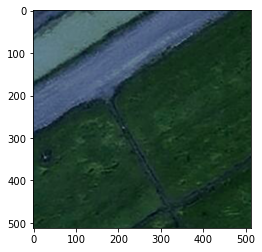

In [27]:
plt.imshow(image)
plt.show()
# cv2_imshow(image)

In [28]:
testgen = DataGen(test_ids, test_path, batch_size=batch_size, image_size=image_size)
x, y = testgen.__getitem__(2)
print(x.shape, y.shape)

(8, 512, 512, 3) (8, 512, 512, 1)


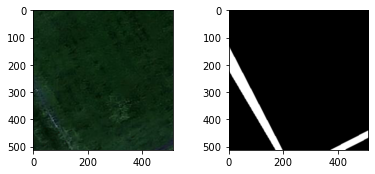

In [29]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")

**Different Blocks**

## Get the ResNet50 model

**RESNET-UNET**

In [30]:
import os
os.getcwd()
dataset_path

'../Data/dataset'

In [31]:
input_shape = (512, 512, 3)
model = build_resnet50_unet(input_shape)
model.load_weights(dataset_path + "/ResNet_UNet.h5")
#model.summary()


**Testing**

In [32]:
test_gen = DataGen(test_ids, test_path, batch_size=5, image_size=image_size)

**Visualize performance**

# **Test the model on unseen data**

**Load weights**

In [1]:
'''
print("\n      Ground Truth            Predicted Value")
for i in range(1, 20, 1):
    ## Dataset for prediction
    x, y = test_gen.__getitem__(i)
    #print(x,y)

    result = model.predict(x)
    result = result > 0.20
    #print(result)
    
    for r in range(len(result)):
        fig = plt.figure()
        fig.subplots_adjust(hspace=0.4, wspace=0.4)
        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(x[r])
        ax = fig.add_subplot(1, 2, 2)
        ax.imshow(np.reshape(result[r]*255, (image_size, image_size)), cmap="gray")
'''


'\nprint("\n      Ground Truth            Predicted Value")\nfor i in range(1, 20, 1):\n    ## Dataset for prediction\n    x, y = test_gen.__getitem__(i)\n    #print(x,y)\n\n    result = model.predict(x)\n    result = result > 0.20\n    #print(result)\n    \n    for r in range(len(result)):\n        fig = plt.figure()\n        fig.subplots_adjust(hspace=0.4, wspace=0.4)\n        ax = fig.add_subplot(1, 2, 1)\n        ax.imshow(x[r])\n        ax = fig.add_subplot(1, 2, 2)\n        ax.imshow(np.reshape(result[r]*255, (image_size, image_size)), cmap="gray")\n'


      Ground Truth            Predicted Value


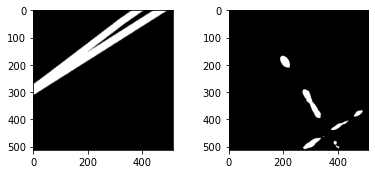

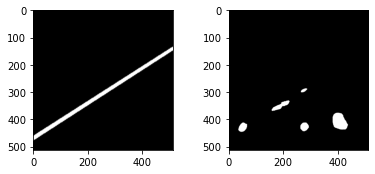

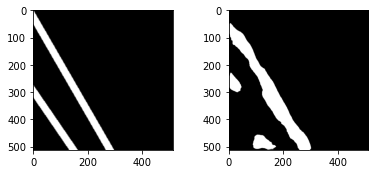

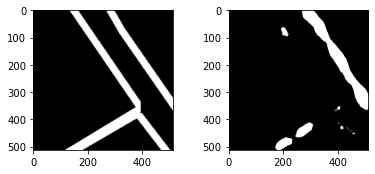

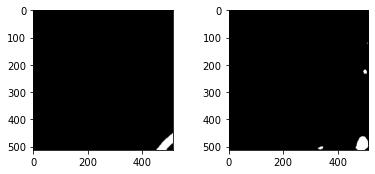

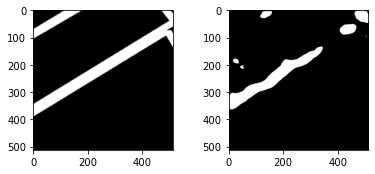

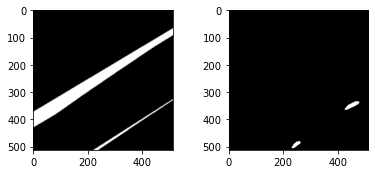

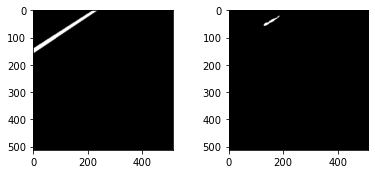

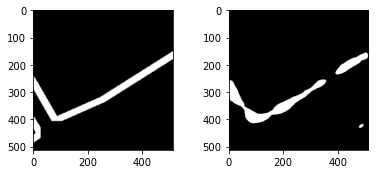

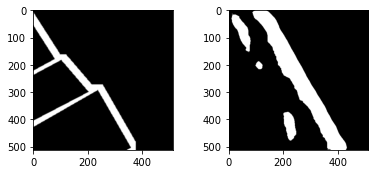

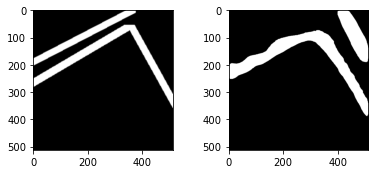

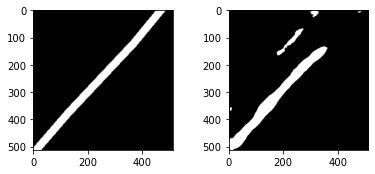

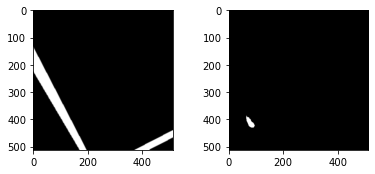

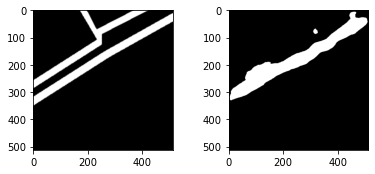

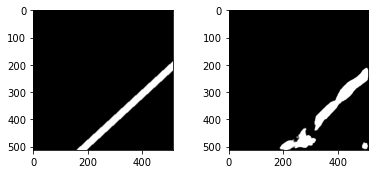

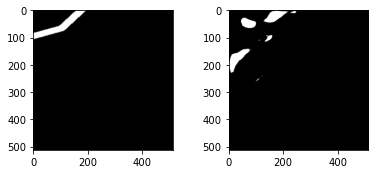

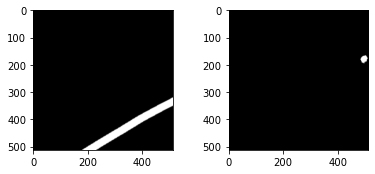

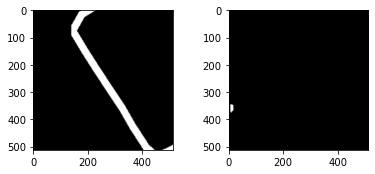

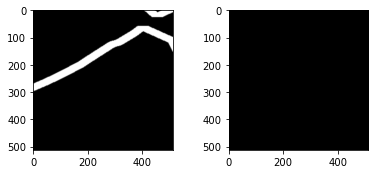

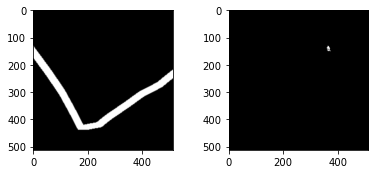

In [33]:
print("\n      Ground Truth            Predicted Value")
for i in range(1, 5, 1):
    ## Dataset for prediction
    x, y = test_gen.__getitem__(i)
    #print(x,y)

    result = model.predict(x)
    result = result > 0.20
    #print(result)
    
    for r in range(len(result)):
        fig = plt.figure()
        fig.subplots_adjust(hspace=0.4, wspace=0.4)
        ax = fig.add_subplot(1, 2, 1)
        #ax.imshow(y[r])
        ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")
        ax = fig.add_subplot(1, 2, 2)
        ax.imshow(np.reshape(result[r]*255, (image_size, image_size)), cmap="gray")


    Ground Truth    True Mask      Predicted Mask


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


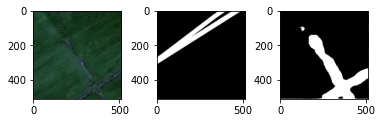

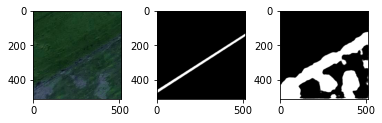

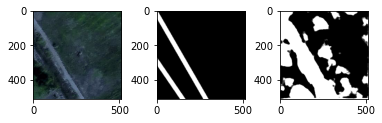

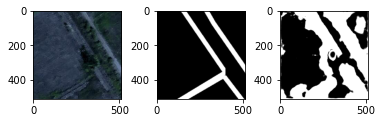

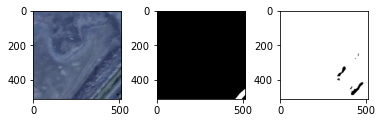

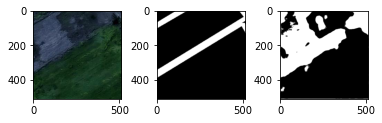

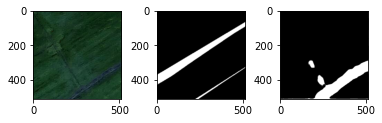

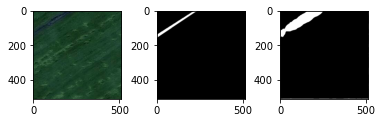

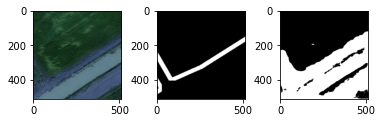

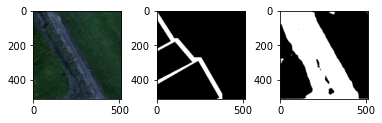

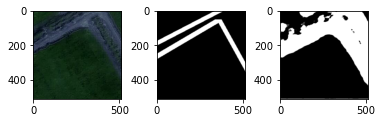

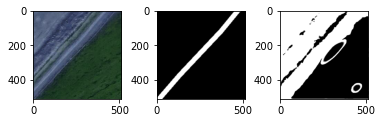

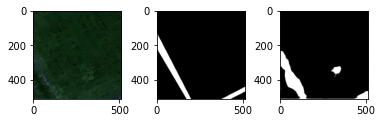

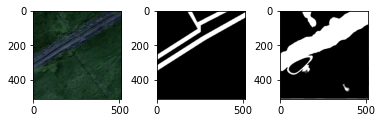

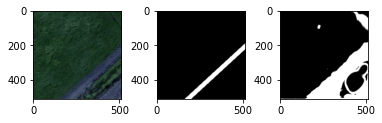

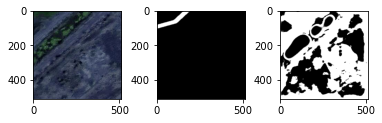

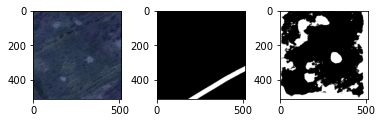

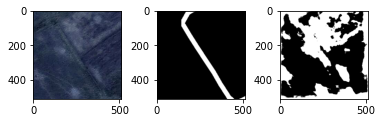

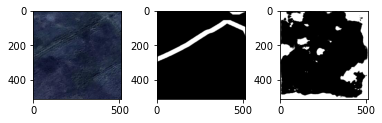

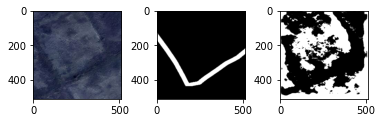

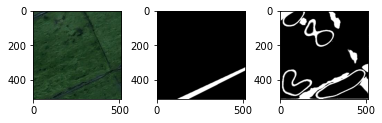

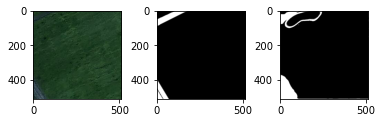

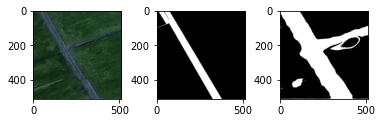

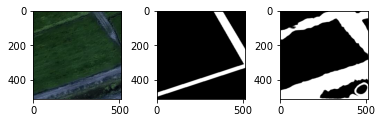

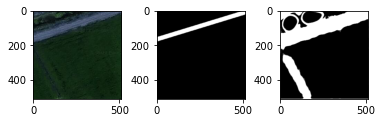

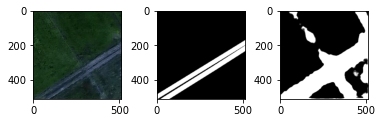

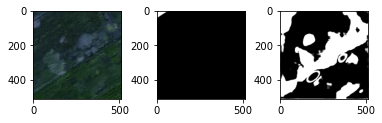

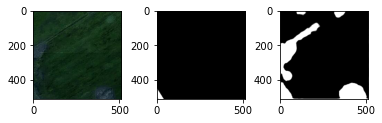

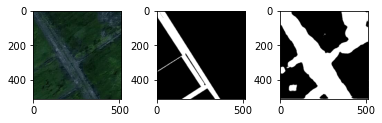

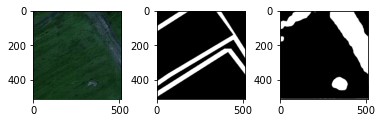

In [38]:
print("\n    Ground Truth    True Mask      Predicted Mask")
for i in range(1, 7, 1):
    ## Dataset for prediction
    x, y = test_gen.__getitem__(i)
    #print(x,y)

    result = model.predict(x)
    result = result > 0.01999123
    #print(result)
    
    for r in range(len(result)):
        fig = plt.figure()
        fig.subplots_adjust(hspace=0.4, wspace=0.4)
        ax = fig.add_subplot(1, 3, 1)
        ax.imshow(x[r])
        #ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")
        ax = fig.add_subplot(1, 3, 2)
        ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")
        ax = fig.add_subplot(1, 3, 3)
        ax.imshow(np.reshape(result[r]*255, (image_size, image_size)), cmap="gray")

In [35]:

#predict model on test data
test_dir = pathlib.Path(dataset_path+"/test/")
#data_dir
images = list(test_dir.glob('images/*'))
# function to predict and save images
def pred_and_save_image(input_img, save_path, idx):
    try:
        image = cv2.imread(str(input_img))
    except:
        image = io.imread(str(input_img), as_gray = True)
    image = cv2.resize(image, (image_size, image_size))
    image = np.expand_dims(image, axis=0) #very important
    image = image/255.0
    image = np.array(image)
    #print(image.shape)
    result = model.predict(image)
    #print(result)
    result = result > 0.078123
    #print(result)
    result = np.reshape(result*255, (image_size, image_size))
    #save a image using the iteration index
    cv2.imwrite(str(save_path)+"/tile_{}.png".format(idx),result)
 
    #return

#for idx, val in enumerate(images):
#    print(val)
#    pred_and_save_image(str(val), dataset_path+"/predicted", idx)

In [36]:
input_shape = (512, 512, 3)
model_sept = build_resnet50_unet(input_shape)
model_sept.load_weights(dataset_path + "/ResNet_UNet.h5")

#try:
image = cv2.imread(r"E:\PlotDel_Steven\Data\subimages\out21.tif")
#except:
 #   pass
    #image = io.imread(r"E:\PlotDel_Steven\Data\dataset\test\images\tile_9728-3840.png", as_gray = True)
image = cv2.resize(image, (image_size, image_size))

image = np.expand_dims(image, axis=0) #very important
image = image/255.0
'''
image = np.array(image)

#print(image.shape)
result = model_sept.predict(image)
#print(result)
result = result > 0.079123
#print(result)
result = np.reshape(result*255, (image_size, image_size))

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[r]*255, (image_size, image_size)), cmap="gray")
'''

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vk9yhgb8\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [33]:
image = cv2.imread(r"E:\PlotDel_Steven\Data\images\tile_4096-6144.png")
print(image.shape)
resized = cv2.resize(image, (512,512), interpolation = cv2.INTER_AREA)
resized.shape


(256, 256, 3)


(512, 512, 3)

In [34]:
# function to predict and save images
def pred_and_save_image(input_img, save_path, idx):
    try:
        image = cv2.imread(str(input_img))
    except:
        image = io.imread(str(input_img), as_gray = True)
    image = cv2.resize(image, (image_size, image_size))
    image = np.expand_dims(image, axis=0) #very important
    image = image/255.0
    image = np.array(image)
    #print(image.shape)
    result = model_sept.predict(image)
    #print(result)
    result = result > 0.078123
    #print(result)
    result = np.reshape(result*255, (image_size, image_size))
    #save a image using the iteration index
    cv2.imwrite(str(save_path)+"/tile_{}.png".format(idx),result)
 

In [37]:
source_dir = "E:/PlotDel_Steven/Data/subimages"
source_dir = pathlib.Path(source_dir)
pred_dir = "E:/PlotDel_Steven/Data/subimages_pred"
pred_dir = pathlib.Path(pred_dir)


Predict the data on the source images (training data)

In [38]:
images = list(source_dir.glob('*'))

for idx, val in enumerate(images):
    pred_and_save_image(str(val), pred_dir, idx)

In [19]:
#import solaris as sol
import os
#import skimage
import matplotlib.pyplot as plt

mask_image = skimage.io.imread(os.path.join(sol.data.data_dir, 'sample_fbc_from_df2px.tif'))

f, ax = plt.subplots(figsize=(10, 8))
plt.imshow(mask_image)

NameError: name 'skimage' is not defined

In [20]:
import rasterio
from rasterio import features
import shapely
from shapely.geometry import Point, Polygon

def mask_to_polygons_layer(mask):
    all_polygons = []
    for shape, value in features.shapes(mask.astype(np.int16), mask=(mask >0), transform=rasterio.Affine(1.0, 0, 0, 0, 1.0, 0)):
        return shapely.geometry.shape(shape)
        all_polygons.append(shapely.geometry.shape(shape))

    all_polygons = shapely.geometry.MultiPolygon(all_polygons)
    if not all_polygons.is_valid:
        all_polygons = all_polygons.buffer(0)
        # Sometimes buffer() converts a simple Multipolygon to just a Polygon,
        # need to keep it a Multi throughout
        if all_polygons.type == 'Polygon':
            all_polygons = shapely.geometry.MultiPolygon([all_polygons])
    return all_polygons



ImportError: DLL load failed: The specified procedure could not be found.

In [131]:
def unblockshaped(arr, h, w):
    
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.

    Source: https://stackoverflow.com/a/16873755
    """
    try: # with color channel
        c, nrows, ncols = arr.shape
        return (arr.reshape(h//nrows, -1, nrows, ncols, c)
                .swapaxes(1,2)
                .reshape(4170, 6043, c))
    except ValueError: # without color channel
        n, nrows, ncols = arr.shape
        return (arr.reshape(h//nrows, -1, nrows, ncols)
                .swapaxes(1,2)
                .reshape(h, w))

In [22]:
'''
def get_saved_preds(scene, path=path):
    "Load saved prediction mask tiles for a scene and return image + assembled mask"
    image_file = (path/scene/'images_masked').ls()[0]
    image = load_image(image_file)

    mask_tiles = get_image_files(path/scene/'predicted_tiles').sorted()
    mask_arrs = np.array(list(maps(partial(load_image, mode="L"), np.asarray, mask_tiles)))
    mask_array = unblockshaped(np.array(mask_arrs), 1020, 1020)

    return (image, mask_array)
    
'''

'\ndef get_saved_preds(scene, path=path):\n    "Load saved prediction mask tiles for a scene and return image + assembled mask"\n    image_file = (path/scene/\'images_masked\').ls()[0]\n    image = load_image(image_file)\n\n    mask_tiles = get_image_files(path/scene/\'predicted_tiles\').sorted()\n    mask_arrs = np.array(list(maps(partial(load_image, mode="L"), np.asarray, mask_tiles)))\n    mask_array = unblockshaped(np.array(mask_arrs), 1020, 1020)\n\n    return (image, mask_array)\n    \n'

In [20]:
from fastai.vision.all import *

In [23]:
import os
os.getcwd()

'E:\\PlotDel_Steven\\sen_proj'

In [132]:
source_dir = "E:/PlotDel_Steven/Data/subimages_pred"
source_dir = pathlib.Path(source_dir)
mask_tiles = get_image_files(source_dir).sorted()
mask_arrs = np.array(list(maps(partial(load_image, mode="L"), np.asarray, mask_tiles)))
mask_array = unblockshaped(np.array(mask_arrs), 12288, 17920)

ValueError: cannot reshape array of size 2359296 into shape (24,newaxis,512,512)

In [21]:
image1 = cv2.imread(r"E:\PlotDel_Steven\Data\subimages\out22.tif")
image1.shape

(4170, 6043, 3)

In [22]:
image = cv2.imread(r"E:\PlotDel_Steven\Data\out.tif")
image.shape

(12365, 17920, 3)

In [109]:
c = np.arange(24).reshape((4,6))
print(c)
# [[ 0  1  2  3  4  5]
#  [ 6  7  8  9 10 11]
#  [12 13 14 15 16 17]
#  [18 19 20 21 22 23]]

#print(blockshaped(c, 2, 3))
# [[[ 0  1  2]
#   [ 6  7  8]]

#  [[ 3  4  5]
#   [ 9 10 11]]

#  [[12 13 14]
#   [18 19 20]]

#  [[15 16 17]
#   [21 22 23]]]

#print(unblockshaped(blockshaped(c, 2, 3), 4, 6))
c.shape

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


(4, 6)

In [103]:
#np.array(image)
mask_arrs[[0]].shape

(1, 512, 512)

In [126]:
c,nrows, ncols = mask_arrs.shape
np.array(mask_arrs).reshape(12288//nrows, -1, nrows, 17920, c)
#    .swapaxes(1,2)
 #   .reshape(512,512))
nrows,ncols,c

ValueError: cannot reshape array of size 2359296 into shape (24,newaxis,512,17920,9)

In [144]:
from patchify import patchify, unpatchify
from skimage.io import imread, imshow
imshow(parch.unpatchify(source_dir, image.shape))

AttributeError: 'WindowsPath' object has no attribute 'shape'

In [149]:
unpatchify(mask_arrs,image.shape)

AssertionError: The patches dimension is not equal to the original image size

In [148]:
source_dir

Path('E:/PlotDel_Steven/Data/subimages_pred')

In [1]:
import solaris as sol
import os
import skimage
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\